In [7]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import sys
sys.path.append('../../src')
from DataHandler import DataHandler

In [9]:
dataHandler = DataHandler("../config.yaml")

## Einlesen der Datensätze

In [10]:
# Lade alle Ähnlichkeitsmatrizen aus der Konfigurationsdatei
print("Lade Ähnlichkeitsmatrizen...")

df_ai_similarity = dataHandler.load_data("data_files.processed_data.similarity_content_based.df_ai_similarity")
df_keyword_cos_similarity = dataHandler.load_data("data_files.processed_data.similarity_keyword_based.df_keyword_cos_similarity")
df_keyword_jaccard_similarity = dataHandler.load_data("data_files.processed_data.similarity_keyword_based.df_keyword_jaccard_similarity")
df_keyword_weighted_jaccard_similarity = dataHandler.load_data("data_files.processed_data.similarity_keyword_based.df_keyword_weighted_jaccard_similarity")
df_keyword_tfidf_cosine_similarity = dataHandler.load_data("data_files.processed_data.similarity_keyword_based.df_keyword_tfidf_cosine_similarity")
df_keyword_overlap_similarity = dataHandler.load_data("data_files.processed_data.similarity_keyword_based.df_keyword_overlap_similarity")
df_keyword_dice_similarity = dataHandler.load_data("data_files.processed_data.similarity_keyword_based.df_keyword_dice_similarity")
df_keyword_hierarchical_similarity = dataHandler.load_data("data_files.processed_data.similarity_keyword_based.df_keyword_hierarchical_similarity")
df_minhash_text_similarity = dataHandler.load_data("data_files.processed_data.similarity_content_based.df_minhash_text_similarity")

Lade Ähnlichkeitsmatrizen...
📂 Lade: ai_similarity_matrix.p
   ✅ Geladen: 4,548 Zeilen × 4548 Spalten
📂 Lade: keyword_cosine_similarity.p
   ✅ Geladen: 4,548 Zeilen × 4548 Spalten
📂 Lade: keyword_jaccard_similarity.p
   ✅ Geladen: 4,548 Zeilen × 4548 Spalten
📂 Lade: keyword_weighted_jaccard_similarity.p
   ✅ Geladen: 4,548 Zeilen × 4548 Spalten
📂 Lade: keyword_tfidf_cosine_similarity.p
   ✅ Geladen: 4,548 Zeilen × 4548 Spalten
📂 Lade: keyword_overlap_similarity.p
   ✅ Geladen: 4,548 Zeilen × 4548 Spalten
📂 Lade: keyword_dice_similarity.p
   ✅ Geladen: 4,548 Zeilen × 4548 Spalten
📂 Lade: keyword_hierarchical_similarity.p
   ✅ Geladen: 4,548 Zeilen × 4548 Spalten
📂 Lade: minhash_text_similarity.p
   ✅ Geladen: 4,548 Zeilen × 4548 Spalten


In [11]:
# Automatische Bereinigung aller Ähnlichkeitsmatrizen
print("Bereinige alle Ähnlichkeitsmatrizen...")

# Liste aller geladenen Ähnlichkeitsmatrizen
similarity_matrices = {
    'AI': df_ai_similarity,
    'MinHash Text': df_minhash_text_similarity,
    'Cosine': df_keyword_cos_similarity,
    'Jaccard': df_keyword_jaccard_similarity,
    'Weighted Jaccard': df_keyword_weighted_jaccard_similarity,
    'TF-IDF Cosine': df_keyword_tfidf_cosine_similarity,
    'Overlap': df_keyword_overlap_similarity,
    'Dice': df_keyword_dice_similarity,
    'Hierarchical': df_keyword_hierarchical_similarity,
}

# Bearbeite alle Matrizen automatisch
for name, matrix in similarity_matrices.items():
    print(f"  Bearbeite {name} Matrix...")
    
    # Entferne Index-Level-Namen (falls vorhanden)
    if hasattr(matrix.index, 'nlevels') and matrix.index.nlevels > 1:
        matrix.index.names = [None] * matrix.index.nlevels
    if hasattr(matrix.columns, 'nlevels') and matrix.columns.nlevels > 1:
        matrix.columns.names = [None] * matrix.columns.nlevels
    
    # Setze Diagonale auf NaN
    np.fill_diagonal(matrix.values, np.nan)
    
    print(f"    ✓ Shape: {matrix.shape}")

print("✅ Alle Ähnlichkeitsmatrizen bereinigt!")
print(f"Verfügbare Matrizen: {list(similarity_matrices.keys())}")

Bereinige alle Ähnlichkeitsmatrizen...
  Bearbeite AI Matrix...
    ✓ Shape: (4548, 4548)
  Bearbeite MinHash Text Matrix...
    ✓ Shape: (4548, 4548)
  Bearbeite Cosine Matrix...
    ✓ Shape: (4548, 4548)
  Bearbeite Jaccard Matrix...
    ✓ Shape: (4548, 4548)
  Bearbeite Weighted Jaccard Matrix...
    ✓ Shape: (4548, 4548)
  Bearbeite TF-IDF Cosine Matrix...
    ✓ Shape: (4548, 4548)
  Bearbeite Overlap Matrix...
    ✓ Shape: (4548, 4548)
  Bearbeite Dice Matrix...
    ✓ Shape: (4548, 4548)
  Bearbeite Hierarchical Matrix...
    ✓ Shape: (4548, 4548)
✅ Alle Ähnlichkeitsmatrizen bereinigt!
Verfügbare Matrizen: ['AI', 'MinHash Text', 'Cosine', 'Jaccard', 'Weighted Jaccard', 'TF-IDF Cosine', 'Overlap', 'Dice', 'Hierarchical']


In [12]:
# Automatische Erstellung der oberen Dreiecksmatrizen für alle Ähnlichkeitsmatrizen
print("Erstelle obere Dreiecksmatrizen...")

def upper_triangle_matrix(df):
    """Erzeugt obere Dreiecksmatrix mit NaN für untere Dreiecks- und Diagonalelemente"""
    mask = np.triu(np.ones(df.shape), k=1).astype(bool)
    upper_triangle_df = df.where(mask)
    return upper_triangle_df

# Erstelle automatisch obere Dreiecksmatrizen für alle Ähnlichkeitsmatrizen
upper_triangle_matrices = {}
for name, matrix in similarity_matrices.items():
    var_name = name.lower().replace(' ', '_').replace('-', '_')
    upper_matrix = upper_triangle_matrix(matrix)
    upper_triangle_matrices[var_name] = upper_matrix
    
    # Erstelle Variablen mit standardisierten Namen
    globals()[f'df_{var_name}_similarity_upper'] = upper_matrix
    
    print(f"  ✓ {name} → df_{var_name}_similarity_upper")

print("✅ Alle oberen Dreiecksmatrizen erstellt!")
print(f"Verfügbare obere Dreiecksmatrizen:")
for key in upper_triangle_matrices.keys():
    print(f"  - df_{key}_similarity_upper")

# Zeige Beispiel der ersten Matrix
first_key = list(upper_triangle_matrices.keys())[0]
first_matrix = upper_triangle_matrices[first_key]
print(f"\nBeispiel (erste Matrix - {first_key}):")
print(f"Shape: {first_matrix.shape}")
print(f"Non-NaN Werte: {first_matrix.count().sum()}")

Erstelle obere Dreiecksmatrizen...
  ✓ AI → df_ai_similarity_upper
  ✓ MinHash Text → df_minhash_text_similarity_upper
  ✓ Cosine → df_cosine_similarity_upper
  ✓ Jaccard → df_jaccard_similarity_upper
  ✓ Weighted Jaccard → df_weighted_jaccard_similarity_upper
  ✓ TF-IDF Cosine → df_tf_idf_cosine_similarity_upper
  ✓ Overlap → df_overlap_similarity_upper
  ✓ Dice → df_dice_similarity_upper
  ✓ Hierarchical → df_hierarchical_similarity_upper
✅ Alle oberen Dreiecksmatrizen erstellt!
Verfügbare obere Dreiecksmatrizen:
  - df_ai_similarity_upper
  - df_minhash_text_similarity_upper
  - df_cosine_similarity_upper
  - df_jaccard_similarity_upper
  - df_weighted_jaccard_similarity_upper
  - df_tf_idf_cosine_similarity_upper
  - df_overlap_similarity_upper
  - df_dice_similarity_upper
  - df_hierarchical_similarity_upper

Beispiel (erste Matrix - ai):
Shape: (4548, 4548)
Non-NaN Werte: 10339878


In [13]:
# Welche column Namen sind in allen 7 Dataframes enthalten?

all_ids = set ()
for matrix in similarity_matrices.values():
    all_ids.update(matrix.columns.tolist())

len(all_ids)

4548

In [14]:
# welche IDs aus welchem DataFrame sind denn in den anderen nicht enthalten?

for name, matrix in similarity_matrices.items():
    missing_ids = set(matrix.columns) - all_ids
    if missing_ids:
        print(f"Fehlende IDs in {name}: {missing_ids}")
    else:
        print(f"Alle IDs in {name} sind in den anderen Matrizen enthalten.")

Alle IDs in AI sind in den anderen Matrizen enthalten.
Alle IDs in MinHash Text sind in den anderen Matrizen enthalten.
Alle IDs in Cosine sind in den anderen Matrizen enthalten.
Alle IDs in Jaccard sind in den anderen Matrizen enthalten.
Alle IDs in Weighted Jaccard sind in den anderen Matrizen enthalten.
Alle IDs in TF-IDF Cosine sind in den anderen Matrizen enthalten.
Alle IDs in Overlap sind in den anderen Matrizen enthalten.
Alle IDs in Dice sind in den anderen Matrizen enthalten.
Alle IDs in Hierarchical sind in den anderen Matrizen enthalten.


Erstelle Histogramme für alle Ähnlichkeitsmatrizen...


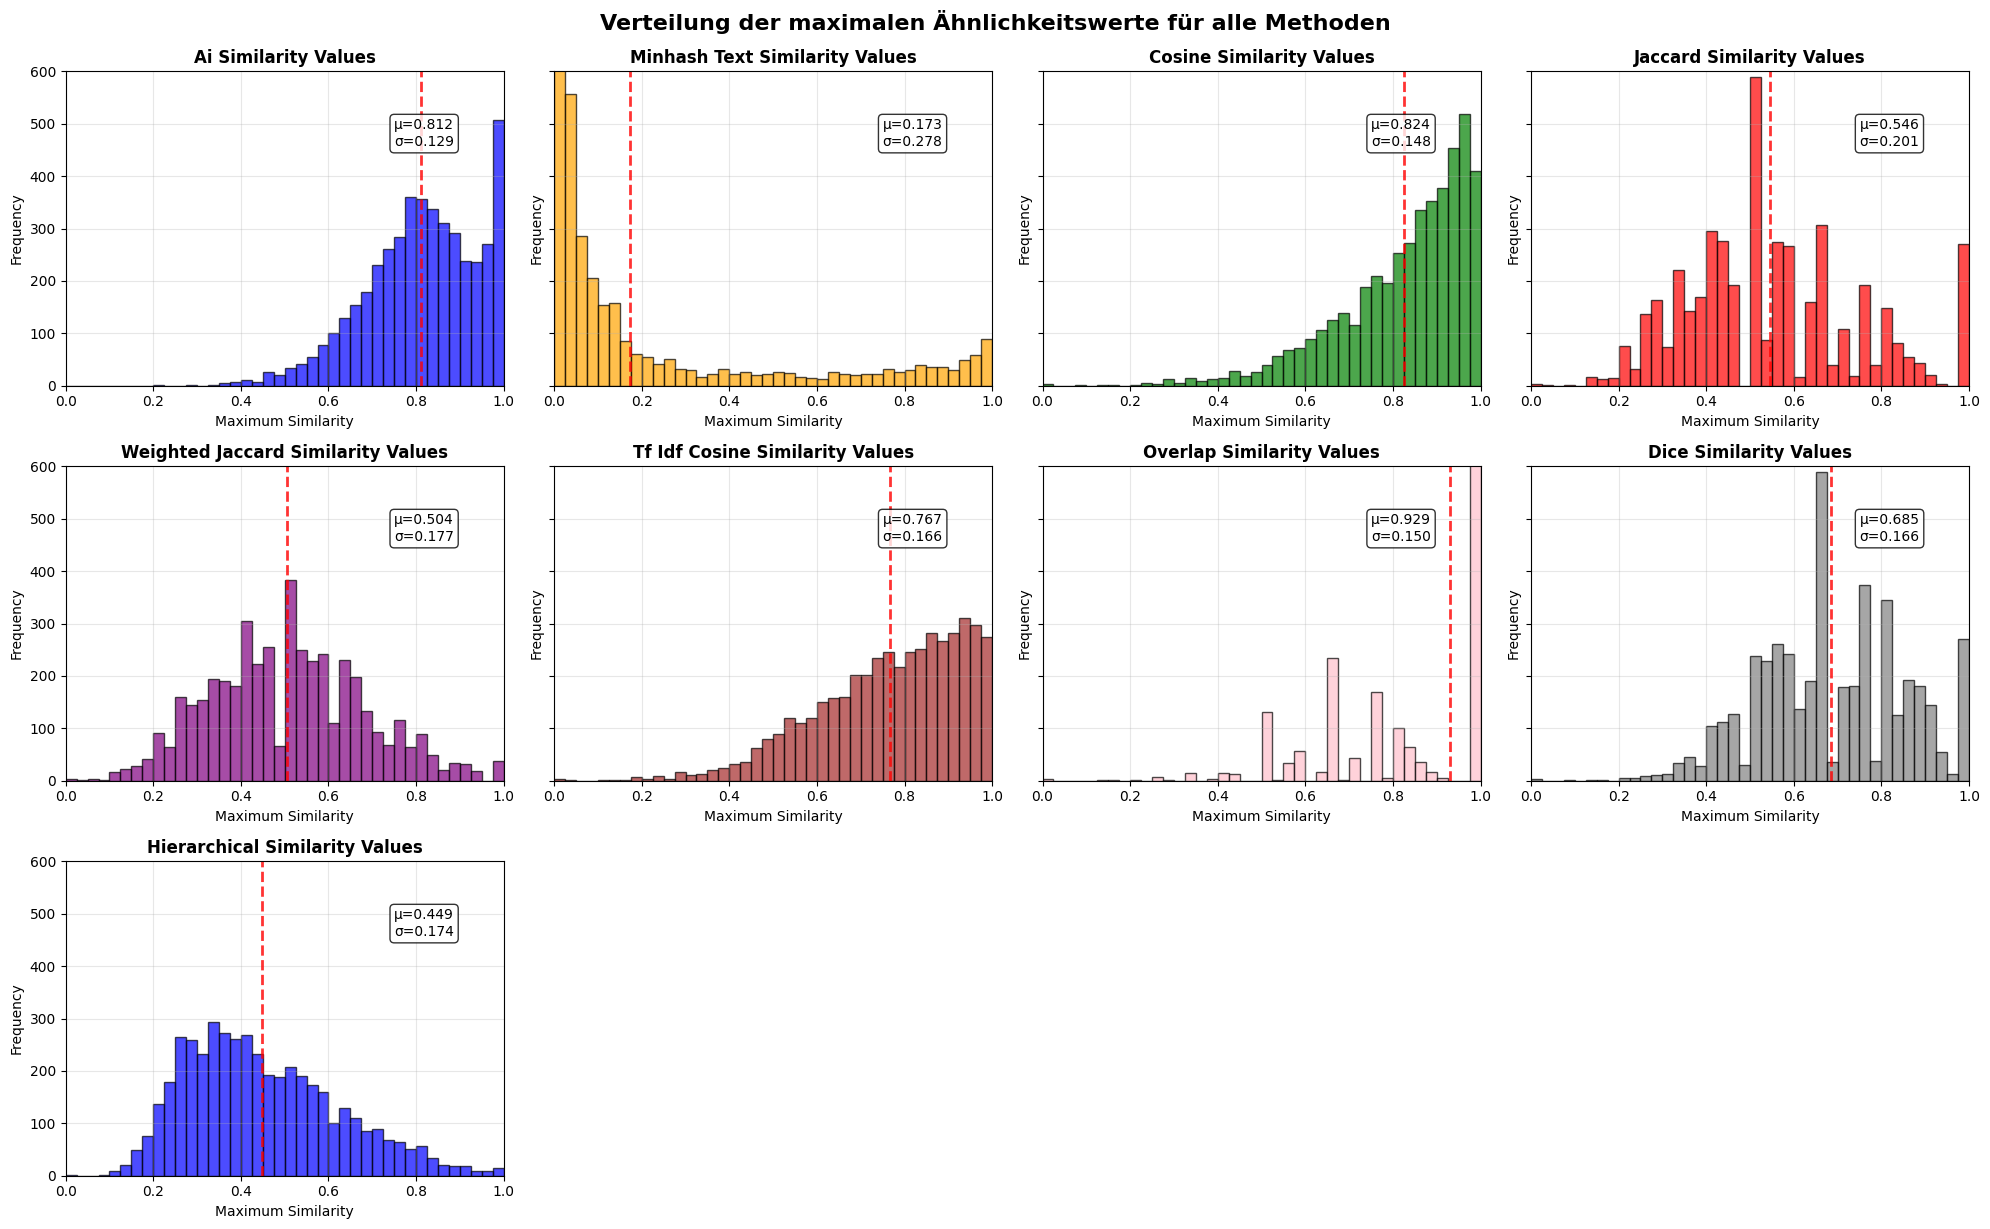

✅ Histogramme für 9 Ähnlichkeitsmatrizen erstellt und gespeichert!
Datei: all_similarity_histograms_comparison.png


In [15]:
# Automatische Histogramm-Visualisierung für alle Ähnlichkeitsmatrizen
print("Erstelle Histogramme für alle Ähnlichkeitsmatrizen...")

# Anzahl der Matrizen bestimmen
n_matrices = len(upper_triangle_matrices)

# Berechne optimale Subplot-Anordnung
import math
n_cols = min(4, n_matrices)  # Maximal 4 Spalten
n_rows = math.ceil(n_matrices / n_cols)

# Erstelle Subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows), sharey=True)

# Stelle sicher, dass axes ein Array ist, auch bei nur einem Subplot
if n_matrices == 1:
    axes = [axes]
elif n_rows == 1:
    axes = axes
else:
    axes = axes.flatten()

# Farben für verschiedene Ähnlichkeitsmatrizen
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

# Erstelle Histogramm für jede Matrix
for i, (name, matrix) in enumerate(upper_triangle_matrices.items()):
    if i < len(axes):
        # Berechne Maximum pro Zeile (Material)
        max_similarities = matrix.max(axis=1)
        
        # Erstelle Histogramm
        max_similarities.hist(
            bins=np.arange(0, 1.01, 0.025), 
            edgecolor='black', 
            ax=axes[i], 
            color=colors[i % len(colors)], 
            alpha=0.7
        )
        
        # Formatiere Titel und Achsen
        axes[i].set_title(f'{name.replace("_", " ").title()} Similarity Values', fontweight='bold')
        axes[i].set_xlabel('Maximum Similarity')
        axes[i].set_ylabel('Frequency')
        axes[i].set_xlim(0, 1)
        axes[i].set_ylim(0, 600)
        axes[i].grid(True, alpha=0.3)
        
        # Füge Statistiken hinzu
        mean_val = max_similarities.mean()
        std_val = max_similarities.std()
        axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.8, linewidth=2)
        
        # Textbox mit Statistiken
        stats_text = f'μ={mean_val:.3f}\nσ={std_val:.3f}'
        axes[i].text(0.75, 0.85, stats_text, transform=axes[i].transAxes, 
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                    verticalalignment='top')

# Verstecke überschüssige Subplots
for i in range(n_matrices, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.suptitle('Verteilung der maximalen Ähnlichkeitswerte für alle Methoden', 
             fontsize=16, y=1.02, fontweight='bold')

# Speichere das Diagramm
plt.savefig('all_similarity_histograms_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Histogramme für {n_matrices} Ähnlichkeitsmatrizen erstellt und gespeichert!")
print("Datei: all_similarity_histograms_comparison.png")

In [16]:
# Automatische Erstellung eines kombinierten DataFrames für alle Ähnlichkeitsmatrizen
# Mit Datei-Logging für Debugging

# Setup für Logging in Datei
import datetime
import os
import psutil  # Für Memory-Monitoring

# Memory-Status zu Beginn
process = psutil.Process()
initial_memory_mb = process.memory_info().rss / (1024 * 1024)
available_memory_gb = psutil.virtual_memory().available / (1024**3)

# Erstelle Log-Datei
log_file = Path("../../processed/build_pairlist_debug.log")
log_file.parent.mkdir(parents=True, exist_ok=True)

def log_print(*args, **kwargs):
    """Druckt sowohl in Konsole als auch in Datei"""
    message = " ".join(str(arg) for arg in args)
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    log_message = f"[{timestamp}] {message}"
    
    # In Konsole ausgeben
    print(message, **kwargs)
    
    # In Datei schreiben
    try:
        with open(log_file, "a", encoding="utf-8") as f:
            f.write(log_message + "\n")
            f.flush()  # Sofort schreiben
    except Exception as e:
        print(f"Logging-Fehler: {e}")

# Starte neues Log
with open(log_file, "w", encoding="utf-8") as f:
    f.write(f"=== BUILD PAIRLIST DEBUG LOG ===\n")
    f.write(f"Started at: {datetime.datetime.now()}\n")
    f.write(f"Log file: {log_file}\n\n")

log_print("Erstelle kombinierten DataFrame für alle Ähnlichkeitsmatrizen...")
log_print("(MultiIndex-Probleme wurden bereits in Zelle 6 bereinigt)")
log_print(f"Debug-Log wird geschrieben nach: {log_file}")

# Memory-Status
log_print(f"💾 MEMORY-STATUS ZU BEGINN:")
log_print(f"   🖥️  Prozess-Memory: {initial_memory_mb:.1f} MB")
log_print(f"   🖥️  Verfügbarer RAM: {available_memory_gb:.1f} GB")
log_print(f"   ⚠️  Kritisch wenn <2GB verfügbar!")

def monitor_memory():
    """Überwacht aktuellen Memory-Verbrauch"""
    current_memory_mb = process.memory_info().rss / (1024 * 1024)
    available_gb = psutil.virtual_memory().available / (1024**3)
    return current_memory_mb, available_gb

def sorted_pair(file1, file2):
    """Erstellt ein sortiertes Tupel für konsistente Paar-Identifikation"""
    return tuple(sorted([file1, file2]))

# Sammle alle Ähnlichkeitswerte pro Dateipaar
all_similarities = {}

log_print(f"Verfügbare Matrizen: {list(upper_triangle_matrices.keys())}")
log_print(f"Anzahl zu verarbeitender Matrizen: {len(upper_triangle_matrices)}")

# VORAB MEMORY-SCHÄTZUNG
total_estimated_pairs = 0
for name, matrix in upper_triangle_matrices.items():
    # Schätze Anzahl Nicht-NaN Paare pro Matrix
    estimated_pairs = matrix.count().sum()
    total_estimated_pairs += estimated_pairs
    log_print(f"  📊 {name}: ~{estimated_pairs:,} geschätzte Paare")

# Geschätzte finale Dictionary-Größe und Memory-Bedarf
estimated_unique_pairs = total_estimated_pairs // len(upper_triangle_matrices)  # Approximation
estimated_total_memory_gb = (estimated_unique_pairs * 200 * len(upper_triangle_matrices)) / (1024**3)  # ~200 bytes pro Eintrag
log_print(f"📊 VORAB-SCHÄTZUNG:")
log_print(f"   📈 Geschätzte eindeutige Paare: ~{estimated_unique_pairs:,}")
log_print(f"   💾 Geschätzter Memory-Bedarf: ~{estimated_total_memory_gb:.1f} GB")
log_print(f"   🖥️  Verfügbarer RAM: {available_memory_gb:.1f} GB")

if estimated_total_memory_gb > available_memory_gb * 0.8:
    log_print(f"   ⚠️  WARNUNG: Geschätzter Memory-Bedarf könnte verfügbaren RAM übersteigen!")
    log_print(f"   💡 Chunk-Verarbeitung wird automatisch aktiviert bei >50k Paaren")

log_print(f"\n🔄 STARTE MATRIX-VERARBEITUNG (mit automatischem Memory-Cleanup):")
log_print("=" * 60)

# Create a copy of the items to avoid "dictionary changed size during iteration" error
matrices_to_process = list(upper_triangle_matrices.items())

for name, matrix in matrices_to_process:
    log_print(f"  Verarbeite {name}...")
    log_print(f"    Matrix Shape: {matrix.shape}")
    log_print(f"    Matrix Index Type: {type(matrix.index)}")
    log_print(f"    Matrix Columns Type: {type(matrix.columns)}")
    
    try:
        # Entferne Index- und Spalten-Namen vor dem Stack-Vorgang
        matrix_clean = matrix.copy()
        matrix_clean.index.name = None
        matrix_clean.columns.name = None
        
        log_print(f"    Matrix nach Bereinigung - Index Name: {matrix_clean.index.name}")
        log_print(f"    Matrix nach Bereinigung - Columns Name: {matrix_clean.columns.name}")
        
        # Einfache Konvertierung zu stacked DataFrame mit future_stack=True
        log_print(f"    Starte Stack-Operation...")
        matrix_stacked = matrix_clean.stack(future_stack=True)
        log_print(f"    Stack erfolgreich - Shape: {matrix_stacked.shape}")
        
        matrix_stacked_df = matrix_stacked.reset_index()
        log_print(f"    Reset Index erfolgreich - Shape: {matrix_stacked_df.shape}")
        log_print(f"    Spalten nach Reset: {list(matrix_stacked_df.columns)}")
        
        # Jetzt sollten es immer 3 Spalten sein
        if len(matrix_stacked_df.columns) != 3:
            log_print(f"    ⚠️  Unerwartete Spaltenanzahl: {len(matrix_stacked_df.columns)}")
            log_print(f"    Spalten: {list(matrix_stacked_df.columns)}")
            continue
        
        # Setze Standardspaltennamen
        matrix_stacked_df.columns = ['file1', 'file2', f'similarity_{name}']
        log_print(f"    Spalten nach Umbenennung: {list(matrix_stacked_df.columns)}")
        
        # Entferne NaN-Werte manuell nach dem Stack-Vorgang
        before_dropna = len(matrix_stacked_df)
        matrix_stacked_df = matrix_stacked_df.dropna(subset=[f'similarity_{name}'])
        after_dropna = len(matrix_stacked_df)
        log_print(f"    DropNA: {before_dropna:,} → {after_dropna:,} Zeilen ({before_dropna-after_dropna:,} entfernt)")
        
        # Erstelle sortierte Paare für konsistente Zuordnung
        log_print(f"    Erstelle sortierte Paare...")
        matrix_stacked_df['Pair'] = matrix_stacked_df.apply(lambda row: sorted_pair(row['file1'], row['file2']), axis=1)
        log_print(f"    Paare erstellt: {len(matrix_stacked_df)} Einträge")
        
        # Speichere die Ähnlichkeitswerte
        processed_pairs = 0
        log_print(f"    Verarbeite Ähnlichkeitswerte...")
        
        for idx, row in matrix_stacked_df.iterrows():
            if processed_pairs % 100000 == 0 and processed_pairs > 0:
                # Memory-Check bei Progress-Updates
                curr_mem, avail_mem = monitor_memory()
                log_print(f"      Progress: {processed_pairs:,} Paare | Memory: {curr_mem:.1f}MB | Verfügbar: {avail_mem:.1f}GB")
                
                if avail_mem < 1.0:  # Warnung bei <1GB verfügbar
                    log_print(f"      ⚠️  MEMORY WARNING: Nur noch {avail_mem:.1f}GB verfügbar!")
            
            pair = row['Pair']
            similarity_value = row[f'similarity_{name}']
            
            # Überspringe NaN-Werte (sollten bereits entfernt sein)
            if pd.isna(similarity_value):
                continue
            
            if pair not in all_similarities:
                all_similarities[pair] = {
                    'file1': pair[0],
                    'file2': pair[1],
                    'Pair': pair
                }
            
            all_similarities[pair][f'similarity_{name}'] = similarity_value
            processed_pairs += 1
        
        # Final Memory-Check nach Verarbeitung
        final_mem, final_avail = monitor_memory()
        log_print(f"    ✅ Verarbeitet: {processed_pairs:,} gültige Paare")
        log_print(f"    💾 Memory nach Verarbeitung: {final_mem:.1f}MB (Verfügbar: {final_avail:.1f}GB)")
        log_print(f"    📊 Gesamt-Dictionary-Größe: {len(all_similarities):,} eindeutige Paare")
        
        # MEMORY CLEANUP: Entferne verarbeitete Matrix aus dem Speicher
        log_print(f"    🧹 MEMORY CLEANUP für {name}...")
        try:
            # Entferne aus upper_triangle_matrices Dictionary
            if name in upper_triangle_matrices:
                del upper_triangle_matrices[name]
                log_print(f"      ✅ {name} aus upper_triangle_matrices entfernt")
            
            # Entferne auch aus globals() falls vorhanden
            var_name = name.lower().replace(' ', '_').replace('-', '_')
            global_var_name = f'df_{var_name}_similarity_upper'
            if global_var_name in globals():
                del globals()[global_var_name]
                log_print(f"      ✅ {global_var_name} aus globals() entfernt")
            
            # Entferne lokale Variablen
            del matrix, matrix_clean, matrix_stacked, matrix_stacked_df
            
            # Force Garbage Collection
            import gc
            collected = gc.collect()
            
            # Memory-Status nach Cleanup
            cleanup_mem, cleanup_avail = monitor_memory()
            memory_freed = final_mem - cleanup_mem
            log_print(f"      🚮 Garbage Collection: {collected} Objekte gesammelt")
            log_print(f"      💾 Memory nach Cleanup: {cleanup_mem:.1f}MB (Verfügbar: {cleanup_avail:.1f}GB)")
            if memory_freed > 0:
                log_print(f"      ✅ Memory freigesetzt: {memory_freed:.1f}MB")
            
        except Exception as cleanup_error:
            log_print(f"      ⚠️  Cleanup-Warnung: {str(cleanup_error)}")
        
    except Exception as e:
        log_print(f"    ❌ Fehler bei {name}: {str(e)}")
        log_print(f"    Matrix Info: Index={type(matrix.index)}, Columns={type(matrix.columns)}")
        # Zeige zusätzliche Debug-Info
        log_print(f"    Index Name: {getattr(matrix.index, 'name', 'None')}")
        log_print(f"    Columns Name: {getattr(matrix.columns, 'name', 'None')}")
        
        # Detaillierte Fehlerinfo
        import traceback
        log_print(f"    Vollständiger Traceback:")
        for line in traceback.format_exc().split('\n'):
            log_print(f"      {line}")
        
        # Cleanup auch bei Fehlern
        try:
            if name in upper_triangle_matrices:
                del upper_triangle_matrices[name]
            var_name = name.lower().replace(' ', '_').replace('-', '_')
            global_var_name = f'df_{var_name}_similarity_upper'
            if global_var_name in globals():
                del globals()[global_var_name]
        except:
            pass
        continue

# FINALE MEMORY-BEREINIGUNG
log_print(f"\n🧹 FINALE MEMORY-BEREINIGUNG:")
try:
    # Entferne alle verbleibenden Matrizen
    remaining_matrices = list(upper_triangle_matrices.keys())
    for matrix_name in remaining_matrices:
        try:
            del upper_triangle_matrices[matrix_name]
        except:
            pass
    
    # Bereinige auch ursprüngliche similarity_matrices wenn möglich
    if 'similarity_matrices' in globals():
        for name in list(similarity_matrices.keys()):
            try:
                del similarity_matrices[name]
            except:
                pass
    
    # Force umfassende Garbage Collection
    import gc
    final_collected = gc.collect()
    
    pre_cleanup_mem, pre_cleanup_avail = monitor_memory()
    log_print(f"💾 Memory vor finaler Bereinigung: {pre_cleanup_mem:.1f}MB (Verfügbar: {pre_cleanup_avail:.1f}GB)")
    log_print(f"🚮 Finale Garbage Collection: {final_collected} Objekte gesammelt")
    
except Exception as final_cleanup_error:
    log_print(f"⚠️  Finale Cleanup-Warnung: {str(final_cleanup_error)}")

# MEMORY-OPTIMIERTE DataFrame-Erstellung
log_print("\nKonvertiere zu DataFrame...")
log_print(f"Anzahl eindeutiger Paare im Dictionary: {len(all_similarities):,}")

# Berechne geschätzte Memory-Anforderung für finalen DataFrame
num_columns = len([k for k in next(iter(all_similarities.values())).keys() if k.startswith('similarity_')]) + 3  # +3 für file1, file2, Pair
estimated_memory_mb = len(all_similarities) * num_columns * 8 / (1024 * 1024)  # ~8 Bytes pro Wert
log_print(f"Geschätzte DataFrame Memory-Anforderung: {estimated_memory_mb:.1f} MB")

# Check verfügbarer Memory vor DataFrame-Erstellung
pre_df_mem, pre_df_avail = monitor_memory()
log_print(f"💾 Memory vor DataFrame-Erstellung: {pre_df_mem:.1f}MB (Verfügbar: {pre_df_avail:.1f}GB)")

try:
    # Direkte DataFrame-Erstellung aus dem all_similarities Dictionary
    # Das Dictionary enthält bereits alle Ähnlichkeitsmetriken pro Paar
    log_print("📊 Erstelle DataFrame aus gesammelten Daten...")
    merged_all_similarities = pd.DataFrame(list(all_similarities.values()))
    
    post_df_mem, post_df_avail = monitor_memory()
    log_print(f"✅ DataFrame erfolgreich erstellt!")
    log_print(f"💾 Memory nach DataFrame-Erstellung: {post_df_mem:.1f}MB (Verfügbar: {post_df_avail:.1f}GB)")
    
    # Bereinige all_similarities Dictionary zur Memory-Freigabe
    log_print("🧹 Bereinige all_similarities Dictionary...")
    all_similarities.clear()
    del all_similarities
    
    import gc
    collected = gc.collect()
    
    final_mem, final_avail = monitor_memory()
    memory_freed = post_df_mem - final_mem
    log_print(f"🚮 Dictionary bereinigt, GC: {collected} Objekte")
    log_print(f"💾 Memory nach Dictionary-Bereinigung: {final_mem:.1f}MB (Verfügbar: {final_avail:.1f}GB)")
    if memory_freed > 0:
        log_print(f"✅ Zusätzlich freigesetzt: {memory_freed:.1f}MB")
    
except MemoryError as mem_err:
    log_print(f"❌ MemoryError bei DataFrame-Erstellung: {str(mem_err)}")
    log_print("🔄 Versuche Fallback-Strategie mit Chunking...")
    
    # Fallback: Chunk-basierte Verarbeitung nur bei MemoryError
    chunk_size = 25000  # Kleinere Chunks bei Memory-Problemen
    total_pairs = len(all_similarities)
    
    processed_data_folder = dataHandler.config_manager.get("folder_structure.processed_data_root")
    chunk_files = []
    all_similarities_items = list(all_similarities.items())
    
    for i in range(0, total_pairs, chunk_size):
        chunk_num = i // chunk_size + 1
        chunk_end = min(i + chunk_size, total_pairs)
        
        log_print(f"  📦 Fallback Chunk {chunk_num} ({i+1:,} bis {chunk_end:,})...")
        
        try:
            chunk_data = [pair_data for _, pair_data in all_similarities_items[i:chunk_end]]
            chunk_df = pd.DataFrame(chunk_data)
            
            chunk_file = Path(processed_data_folder) / f"fallback_chunk_{chunk_num:03d}.p"
            chunk_df.to_pickle(chunk_file)
            chunk_files.append(chunk_file)
            
            log_print(f"    ✅ Fallback Chunk {chunk_num}: {len(chunk_df):,} Zeilen gespeichert")
            del chunk_df, chunk_data
            
        except Exception as e:
            log_print(f"    ❌ Fehler bei Fallback Chunk {chunk_num}: {str(e)}")
            continue
    
    # Kombiniere Fallback-Chunks
    log_print(f"🔄 Kombiniere {len(chunk_files)} Fallback-Chunks...")
    try:
        if chunk_files:
            merged_all_similarities = pd.read_pickle(chunk_files[0])
            log_print(f"  📂 Fallback Basis: {len(merged_all_similarities):,} Zeilen")
            
            for i, chunk_file in enumerate(chunk_files[1:], 2):
                try:
                    chunk_df = pd.read_pickle(chunk_file)
                    merged_all_similarities = pd.concat([merged_all_similarities, chunk_df], ignore_index=True)
                    log_print(f"  📂 Fallback Chunk {i}: Total {len(merged_all_similarities):,} Zeilen")
                    del chunk_df
                except Exception as e:
                    log_print(f"  ❌ Fehler bei Fallback Chunk {i}: {str(e)}")
        else:
            merged_all_similarities = pd.DataFrame()
    except Exception as e:
        log_print(f"❌ Fallback komplett fehlgeschlagen: {str(e)}")
        merged_all_similarities = pd.DataFrame()
    
    # Cleanup Fallback-Dateien
    for chunk_file in chunk_files:
        try:
            chunk_file.unlink()
        except:
            pass
            
except Exception as e:
    log_print(f"❌ Unerwarteter Fehler bei DataFrame-Erstellung: {str(e)}")
    import traceback
    for line in traceback.format_exc().split('\n'):
        log_print(f"  {line}")
    merged_all_similarities = pd.DataFrame()

# Memory-Status nach DataFrame-Erstellung
if len(merged_all_similarities) > 0:
    actual_memory_mb = merged_all_similarities.memory_usage(deep=True).sum() / (1024 * 1024)
    log_print(f"💾 Tatsächlicher Memory-Verbrauch: {actual_memory_mb:.1f} MB")

# Zeige Statistiken
log_print(f"\n✅ Kombinierter DataFrame erstellt!")
log_print(f"📊 Anzahl Dateipaare: {len(merged_all_similarities):,}")
log_print(f"📈 Anzahl erfolgreich verarbeiteter Matrizen: {len([col for col in merged_all_similarities.columns if col.startswith('similarity_')])}")
log_print(f"📋 DataFrame Shape: {merged_all_similarities.shape}")

# Zeige Spaltenübersicht
log_print(f"\n📋 Verfügbare Ähnlichkeitsmetriken:")
similarity_columns = [col for col in merged_all_similarities.columns if col.startswith('similarity_')]
for col in similarity_columns:
    non_nan_count = merged_all_similarities[col].count()
    log_print(f"  - {col}: {non_nan_count:,} gültige Werte")

# Zeige erste Zeilen
if len(merged_all_similarities) > 0:
    log_print(f"\n🔍 Erste 5 Zeilen:")
    log_print(str(merged_all_similarities.head()))
    display(merged_all_similarities.head())
else:
    log_print("\n⚠️  Kein DataFrame erstellt - alle Matrizen fehlgeschlagen!")

log_print(f"\n=== DEBUG LOG ABGESCHLOSSEN ===")
log_print(f"Vollständiges Log verfügbar in: {log_file}")
log_print(f"End time: {datetime.datetime.now()}")

Erstelle kombinierten DataFrame für alle Ähnlichkeitsmatrizen...
(MultiIndex-Probleme wurden bereits in Zelle 6 bereinigt)
Debug-Log wird geschrieben nach: ../../processed/build_pairlist_debug.log
💾 MEMORY-STATUS ZU BEGINN:
   🖥️  Prozess-Memory: 3042.5 MB
   🖥️  Verfügbarer RAM: 11.3 GB
   ⚠️  Kritisch wenn <2GB verfügbar!
Verfügbare Matrizen: ['ai', 'minhash_text', 'cosine', 'jaccard', 'weighted_jaccard', 'tf_idf_cosine', 'overlap', 'dice', 'hierarchical']
Anzahl zu verarbeitender Matrizen: 9
  📊 ai: ~10,339,878 geschätzte Paare
  📊 minhash_text: ~10,339,878 geschätzte Paare
  📊 cosine: ~10,339,878 geschätzte Paare
  📊 jaccard: ~10,339,878 geschätzte Paare
  📊 weighted_jaccard: ~10,339,878 geschätzte Paare
  📊 tf_idf_cosine: ~10,339,878 geschätzte Paare
  📊 overlap: ~10,339,878 geschätzte Paare
  📊 dice: ~10,339,878 geschätzte Paare
  📊 hierarchical: ~10,339,878 geschätzte Paare
📊 VORAB-SCHÄTZUNG:
   📈 Geschätzte eindeutige Paare: ~10,339,878
   💾 Geschätzter Memory-Bedarf: ~17.3 GB


,file1,file2,Pair,similarity_ai,similarity_minhash_text,similarity_cosine,similarity_jaccard,similarity_weighted_jaccard,similarity_tf_idf_cosine,similarity_overlap,similarity_dice,similarity_hierarchical
0,8I6sM5zapD60,8ZICOHBmAHyQ,"(8I6sM5zapD60, 8ZICOHBmAHyQ)",0.381628,0.0,0.000000,0.0,0.000000,0.00000,0.00,0.000000,0.130000
1,8I6sM5zapD60,8Lfz8SAKa6k0,"(8I6sM5zapD60, 8Lfz8SAKa6k0)",0.141063,0.0,0.433013,0.1,0.058824,0.20156,0.25,0.181818,0.133929
2,3ztCv-WpxJ4U,8I6sM5zapD60,"(3ztCv-WpxJ4U, 8I6sM5zapD60)",0.266481,0.0,0.000000,0.0,0.000000,0.00000,0.00,0.000000,0.012500
3,6mOhjfscZK2A,8I6sM5zapD60,"(6mOhjfscZK2A, 8I6sM5zapD60)",0.476874,0.0,0.000000,0.0,0.000000,0.00000,0.00,0.000000,0.122917
4,1eteONeHL82Y,8I6sM5zapD60,"(1eteONeHL82Y, 8I6sM5zapD60)",0.436708,0.0,0.000000,0.0,0.000000,0.00000,0.00,0.000000,0.095833



=== DEBUG LOG ABGESCHLOSSEN ===
Vollständiges Log verfügbar in: ../../processed/build_pairlist_debug.log
End time: 2025-07-29 16:07:16.276460


In [17]:
# Speichern des kombinierten DataFrames
print("💾 Speichere kombinierten DataFrame über DataHandler...")

# Speichere den neuen kombinierten DataFrame über DataHandler API
dataHandler.save_data(merged_all_similarities, "data_files.processed_data.combined_analysis.df_similarity")

print(f"\n🎉 FERTIG! Alle {len([col for col in merged_all_similarities.columns if col.startswith('similarity_')])} Ähnlichkeitsmetriken erfolgreich kombiniert und gespeichert!")

💾 Speichere kombinierten DataFrame über DataHandler...
💾 Datei gespeichert: similarity_all_metrics.p
   📁 Pfad: /media/sz/Data/Connected_Lecturers/Opal/processed/analysis/similarity_all_metrics.p
   📊 DataFrame: 10,339,878 Zeilen × 12 Spalten
   📏 Dateigröße: 921.2 MB
   🕐 Zeitstempel: 2025-07-29 16:07:21
   ⏱️  Speicherdauer: 4.93 Sekunden

🎉 FERTIG! Alle 9 Ähnlichkeitsmetriken erfolgreich kombiniert und gespeichert!
